In [16]:
from lab import *

In [17]:
dsht = pd.read_excel('data.ods', sheet_name=None)
res = dsht['res']
ach = dsht['ACH']
fch = dsht['FCH']

In [18]:
f_0n = res['f_0n(kHz)']
cap = res['C(nF)']
u_c = res['U_C(V)']

In [19]:
def f(x, a, b, c, d):
  return a / np.sqrt(b + (c * x - d / x)**2)

/usr/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


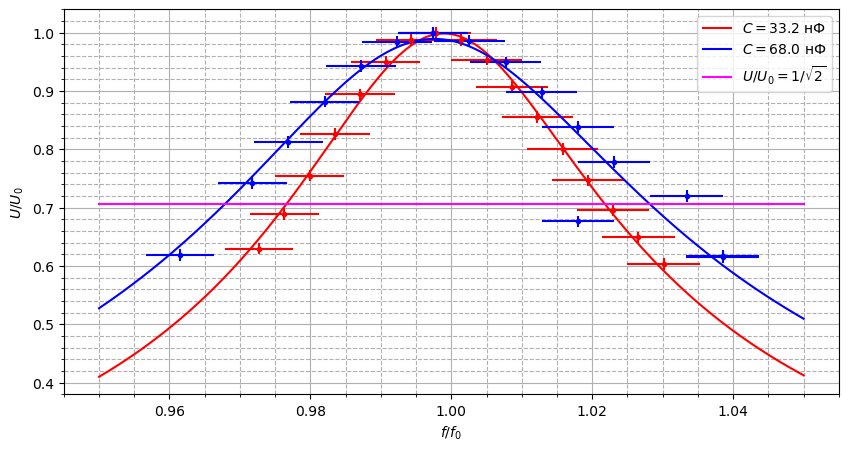

In [34]:
colors = ['red', 'blue']
plt.figure(figsize=FIGSIZE)
labels = [r'$C = 33.2$ нФ', r'$C = 68.0$ нФ']
freqs = [27.86, 19.47]
x = np.linspace(0.95, 1.05, 1000)

for i in [1, 2]:
  freq = ach[f'f{i}(kHz)'] / freqs[i - 1]
  volt = ach[f'U_C{i}(V)']
  volt /= max(volt)
  plt.errorbar(freq, volt, xerr=freq*0.005, yerr=0.01, fmt=f'{colors[i - 1][0]}.')
  par, _ = fit(f=f, x=freq, y=volt)
  plt.plot(x, f(x, *par), color=colors[i - 1], label=labels[i - 1])

plt.plot(x, 0.707 + 0*x, label=r'$U / U_0 = 1 / \sqrt{2}$', color='magenta')
plt_singleton(title=None, xlabel=r'$f/f_0$', ylabel=r'$U/U_0$')
plt.savefig('ACH.pdf')